В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.
Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import calendar

In [20]:
cows = pd.read_csv('monthly-milk-production.csv', sep = ';', parse_dates=['month'], dayfirst=True)

In [21]:
cows.head(20)

,month,milk
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727
5,1962-06-01,697
6,1962-07-01,640
7,1962-08-01,599
8,1962-09-01,568
9,1962-10-01,577


In [22]:
cows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
month    168 non-null datetime64[ns]
milk     168 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


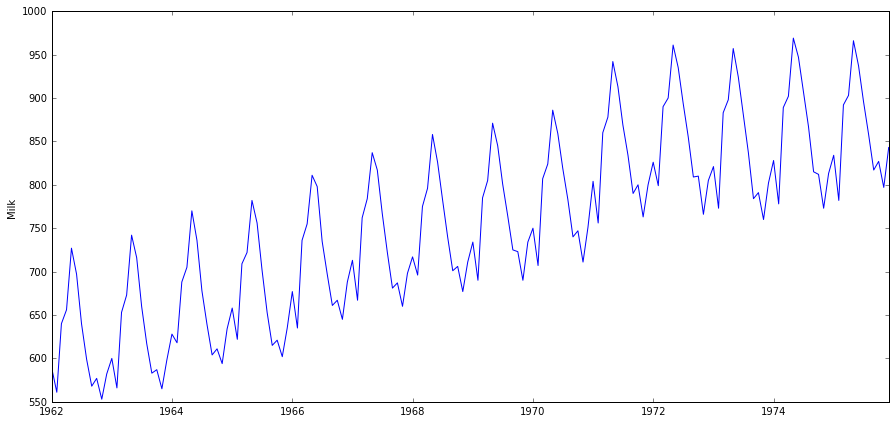

In [24]:
plt.figure(figsize(15,7))
plt.plot(cows.month, cows.milk, label = 'Milk')
plt.ylabel('Milk')
#plt.xlim('1962-01-01', '1963-05-01')

In [26]:
cows.columns = ['date', 'milk']

In [27]:
cows['year'] = cows.date.apply(lambda x : x.year)
cows['month'] = cows.date.apply(lambda x : x.month)

In [28]:
cows.head(20)

,date,milk,year,month
0,1962-01-01,589,1962,1
1,1962-02-01,561,1962,2
2,1962-03-01,640,1962,3
3,1962-04-01,656,1962,4
4,1962-05-01,727,1962,5
5,1962-06-01,697,1962,6
6,1962-07-01,640,1962,7
7,1962-08-01,599,1962,8
8,1962-09-01,568,1962,9
9,1962-10-01,577,1962,10


In [51]:
cows['meanDayMilk'] = 0.0

In [52]:
for i in range(len(cows)):
    cows.meanDayMilk.values[i] = float(cows.milk.values[i]) / float(calendar.monthrange(cows.year.values[i], cows.month.values[i])[1])

In [53]:
cows.head(20)

,date,milk,year,month,meanDayMilk
0,1962-01-01,589,1962,1,19.000000
1,1962-02-01,561,1962,2,20.035714
2,1962-03-01,640,1962,3,20.645161
3,1962-04-01,656,1962,4,21.866667
4,1962-05-01,727,1962,5,23.451613
5,1962-06-01,697,1962,6,23.233333
6,1962-07-01,640,1962,7,20.645161
7,1962-08-01,599,1962,8,19.322581
8,1962-09-01,568,1962,9,18.933333
9,1962-10-01,577,1962,10,18.612903


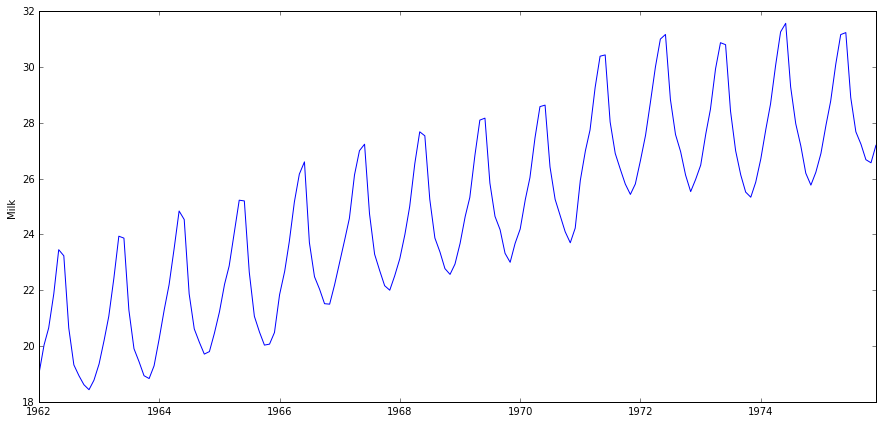

In [54]:
plt.figure(figsize(15,7))
plt.plot(cows.date, cows.meanDayMilk, label='Milk')
plt.ylabel('Milk')
#plt.xlim('1962-01-01', '1964-05-01')

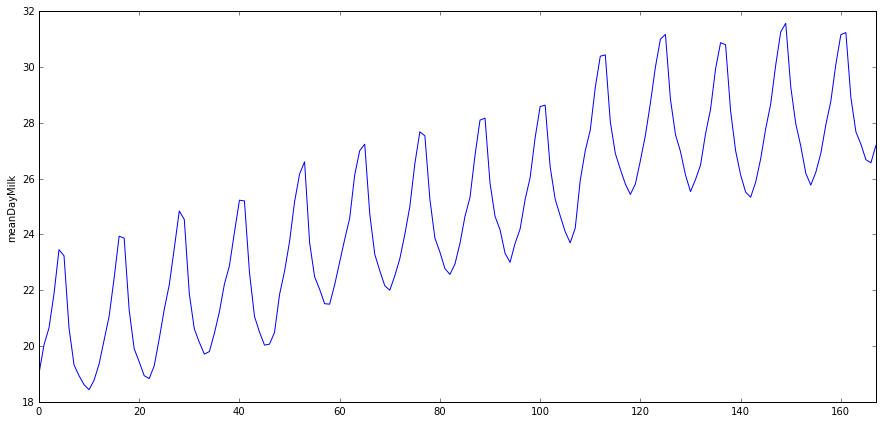

In [55]:
plt.figure(figsize(15,7))
cows.meanDayMilk.plot()
plt.ylabel('meanDayMilk')

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [58]:
print "Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(cows.meanDayMilk)[1]

Критерий Дики-Фуллера: p=0.682215


In [61]:
cows['daily_diff12'] = cows.meanDayMilk - cows.meanDayMilk.shift(12)

In [63]:
cows.head(20)

,date,milk,year,month,meanDayMilk,daily_diff12
0,1962-01-01,589,1962,1,19.000000,NaN
1,1962-02-01,561,1962,2,20.035714,NaN
2,1962-03-01,640,1962,3,20.645161,NaN
3,1962-04-01,656,1962,4,21.866667,NaN
4,1962-05-01,727,1962,5,23.451613,NaN
5,1962-06-01,697,1962,6,23.233333,NaN
6,1962-07-01,640,1962,7,20.645161,NaN
7,1962-08-01,599,1962,8,19.322581,NaN
8,1962-09-01,568,1962,9,18.933333,NaN
9,1962-10-01,577,1962,10,18.612903,NaN


In [65]:
print "Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(cows.daily_diff12[12:])[1]

Критерий Дики-Фуллера: p=0.221277


In [66]:
cows['daily_diff12and1'] = cows.daily_diff12 - cows.daily_diff12.shift(1)

In [68]:
cows.head(20)

,date,milk,year,month,meanDayMilk,daily_diff12,daily_diff12and1
0,1962-01-01,589,1962,1,19.000000,NaN,NaN
1,1962-02-01,561,1962,2,20.035714,NaN,NaN
2,1962-03-01,640,1962,3,20.645161,NaN,NaN
3,1962-04-01,656,1962,4,21.866667,NaN,NaN
4,1962-05-01,727,1962,5,23.451613,NaN,NaN
5,1962-06-01,697,1962,6,23.233333,NaN,NaN
6,1962-07-01,640,1962,7,20.645161,NaN,NaN
7,1962-08-01,599,1962,8,19.322581,NaN,NaN
8,1962-09-01,568,1962,9,18.933333,NaN,NaN
9,1962-10-01,577,1962,10,18.612903,NaN,NaN


In [69]:
print "Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(cows.daily_diff12and1[13:])[1]

Критерий Дики-Фуллера: p=0.000002


Ответ: Нужно провести сначала сезонное, а затем простое дифференцирование.

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной и частичной автокорреляционной функций. 
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

In [74]:
import statsmodels.api as sm

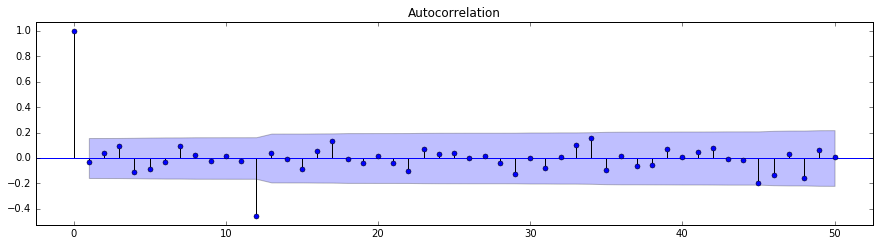

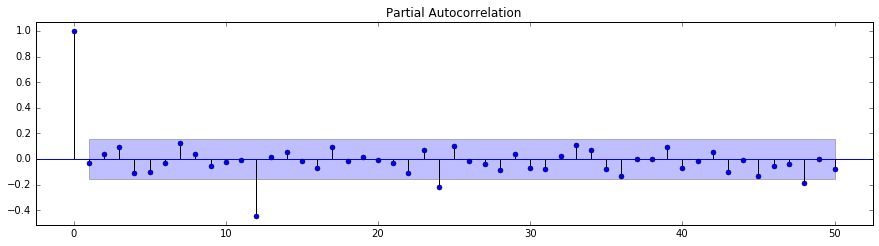

In [77]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(cows.daily_diff12and1[13:].values.squeeze(), lags=50, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(cows.daily_diff12and1[13:].values.squeeze(), lags=50, ax=ax)
pylab.show()

Ответ: Q = 1, p = 0